In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf  #Si no se cuenta con esta librería se deberá instalar utilizando 'pip install yfinance'

plt.style.use('fivethirtyeight')
%matplotlib inline

paleta = sns.choose_colorbrewer_palette('qualitative')

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

In [139]:
#Funciones útiles

#Establecemos la paleta seleccionada arriba
sns.set_palette(paleta)

#Color s/valor
def get_color(value):
    if value < 0:
        return paleta[0]
    else:
        return paleta[2]
    
#Graficar retornos
    
def grafRetorno(data, titulo):
    fig, ax = plt.subplots(figsize=(15, 16))
    plt.tight_layout()
    data.plot(marker='o',markersize=.6,markerfacecolor='k', lw=.6, subplots=True, ax=ax)
    plt.suptitle(titulo, fontsize=25)
    plt.subplots_adjust(top=.94)
    plt.show()

#Graficar promedio y std    
def grafAvgStd(data, graf, titulo, color):
    axs[graf].plot(data, marker='o',markersize=10, lw=0, color=color)

    for stock, value in data.items():
        axs[graf].annotate(f"{stock}: {value:.5f}", xy=(stock, value), xytext=(stock, value))

    axs[graf].set_title(titulo)

In [6]:
# Leemos el índice S&P500, este será nuestro benchmark
benchmark_data = yf.Ticker('^GSPC').history(period='max')[['Close']]
benchmark_data.index = benchmark_data.index.strftime('%Y-%m-%d')

# ingresar la cantidad de acciones a analizar
n = int(input("¿Cuántas acciones desea analizar? "))

# Creamos un diccionario vacío para almacenar los datos de cada acción
datasets = {}

# ingresar el símbolo de cada acción y almacenamos los datos en el diccionario
for i in range(n):
    accion = input("Ingrese el símbolo de la acción {}:".format(i+1))
    ticker = yf.Ticker(accion)
    dataframe = ticker.history(period='max')
    dataframe.index = dataframe.index.strftime('%Y-%m-%d')
    datasets[accion] = pd.DataFrame(dataframe['Close'])
    
#Corremos un bucle para reemplazar la columna Close, por el nombre de cada dataset
for name, df in datasets.items():
    df.rename(columns={'Close': name}, inplace=True)

#Corremos un pucle para asignar cada dataset del diccionario "datasets" a una variable cuyo nombre es la clave correspondiente del diccionario. 
for key, value in datasets.items():
    globals()[key] = value

¿Cuántas acciones desea analizar? 5
Ingrese el símbolo de la acción 1:AAPL
Ingrese el símbolo de la acción 2:AMZN
Ingrese el símbolo de la acción 3:GOOGL
Ingrese el símbolo de la acción 4:MSFT
Ingrese el símbolo de la acción 5:META


In [7]:
# Unimos los datasets en el índice
stocks_data = AAPL.merge(AMZN, left_index=True, right_index=True)\
                  .merge(GOOGL, left_index=True, right_index=True)\
                  .merge(MSFT, left_index=True, right_index=True)\
                  .merge(META, left_index=True, right_index=True)

# Mostrar el resultado
print(stocks_data.head())

                 AAPL     AMZN      GOOGL       MSFT       META
Date                                                           
2012-05-18  16.122004  10.6925  15.025025  23.721563  38.230000
2012-05-21  17.061277  10.9055  15.368118  24.110569  34.029999
2012-05-22  16.930267  10.7665  15.035035  24.118671  31.000000
2012-05-23  17.343365  10.8640  15.251752  23.591890  32.000000
2012-05-24  17.184076  10.7620  15.106607  23.559473  33.029999


In [8]:
# Ingresar año de inicio y fin para filtrar los datos
start_year = str(input("Introduzca el año de inicio (en formato YYYY): "))
end_year = str(input("Introduzca el año de fin (en formato YYYY): "))

# Convertir los años del dataset 'stocks_data' de fecha para poder filtrar por rango de fechas
start_date_benchmark = start_year + '-01-01'
end_date_benchmark = end_year + '-12-31'

benchmark_data = benchmark_data.loc[start_date_benchmark:end_date_benchmark]

# Convertir los años del dataset 'stocks_data' de fecha para poder filtrar por rango de fechas
start_date_stocks = start_year + '-01-01'
end_date_stocks = end_year + '-12-31'

# Filtrar los datos por rango de fechas
stocks_data = stocks_data.loc[start_date_stocks:end_date_stocks]

Introduzca el año de inicio (en formato YYYY): 2020
Introduzca el año de fin (en formato YYYY): 2022


In [161]:
#Una primera mirada a los datos
print(f'{"#"*25} Detalles del dataset "stocks_data" {"#"*25}\n')
print(f'{stocks_data.info()}\n')
print(f'{"#"*25} Detalles del dataset "benchmark_data" {"#"*25}\n')
print(f'{benchmark_data.info()}')

######################### Detalles del dataset "stocks_data" #########################

<class 'pandas.core.frame.DataFrame'>
Index: 756 entries, 2020-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    756 non-null    float64
 1   AMZN    756 non-null    float64
 2   GOOGL   756 non-null    float64
 3   MSFT    756 non-null    float64
 4   META    756 non-null    float64
dtypes: float64(5)
memory usage: 51.6+ KB
None

######################### Detalles del dataset "benchmark_data" #########################

<class 'pandas.core.frame.DataFrame'>
Index: 756 entries, 2020-01-02 to 2022-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 11.8+ KB
None


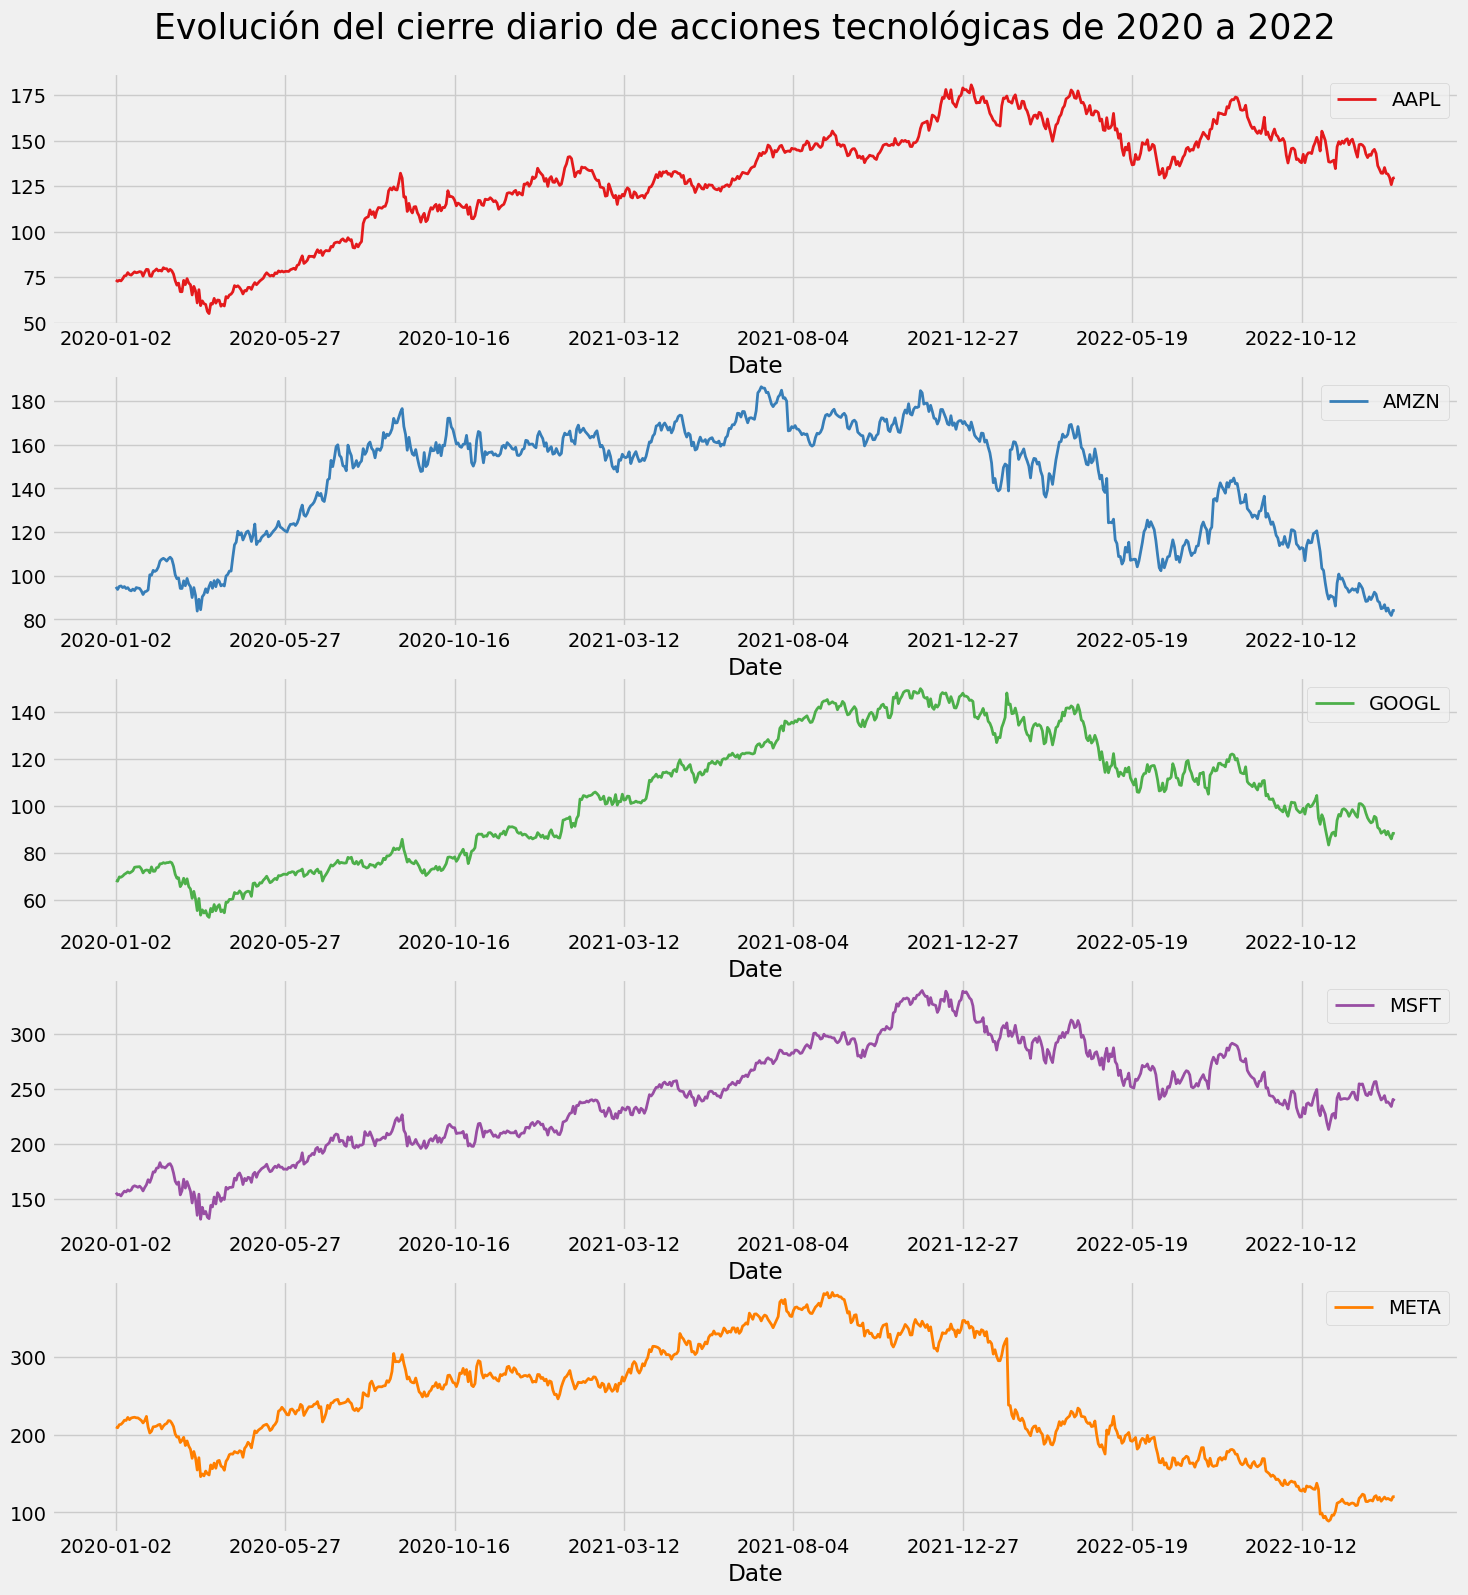

Estadísticas descriptivas breves del cierre diario de las acciones: 

              AAPL        AMZN       GOOGL        MSFT        META
count  756.000000  756.000000  756.000000  756.000000  756.000000
mean   129.089308  142.455482  104.257655  242.173247  245.373506
std     30.768550   27.856019   26.472870   48.013355   73.024365
min     54.999004   81.820000   52.706501  131.682693   88.910004
25%    113.995455  118.337875   78.220125  207.664597  187.955006
50%    134.528336  154.467499  104.272999  243.189377  249.070000
75%    149.912617  164.633247  126.982876  280.478577  308.759995
max    180.683868  186.570496  149.838501  339.075562  382.179993


In [162]:
# Visualizamos los datos de las Acciones

fig, ax = plt.subplots(figsize=(15, 16))
plt.tight_layout()

stocks_data.plot(subplots=True, lw=2, ax=ax)
plt.suptitle("Evolución del cierre diario de acciones tecnológicas de 2020 a 2022", fontsize=25)
plt.subplots_adjust(top=.94)
plt.show()


# Datos estadísticos sumarios de las acciones
print(f'Estadísticas descriptivas breves del cierre diario de las acciones: \n\n {stocks_data.describe()}')

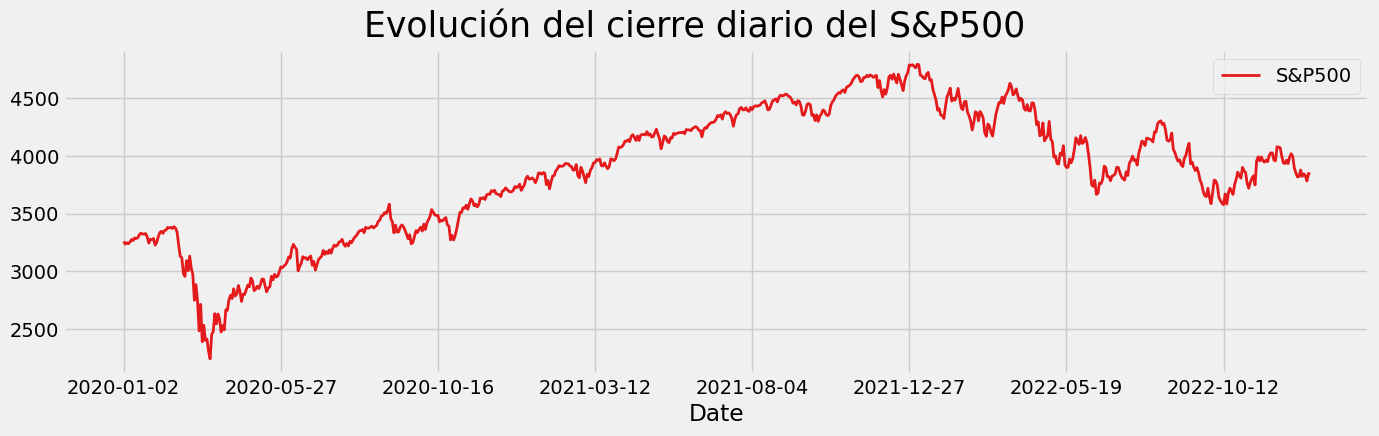

Estadísticas descriptivas breves del cierre diario de nuestro índice (S&P500): 

              Close
count   756.000000
mean   3862.087184
std     551.186451
min    2237.399902
25%    3406.750061
50%    3915.984985
75%    4320.159912
max    4796.560059


In [163]:
# Graficamos los datos de nuestra referencia (S&P 500)
fig, ax = plt.subplots(figsize=(15, 4))
benchmark_data.plot(lw=2, ax=ax, color=paleta[0])
plt.suptitle("Evolución del cierre diario del S&P500", fontsize=25)
plt.legend(labels=["S&P500"])
plt.show()


# Datos estadísticos sumarios de (S&P 500)
print(f'Estadísticas descriptivas breves del cierre diario de nuestro índice (S&P500): \n\n {benchmark_data.describe()}')

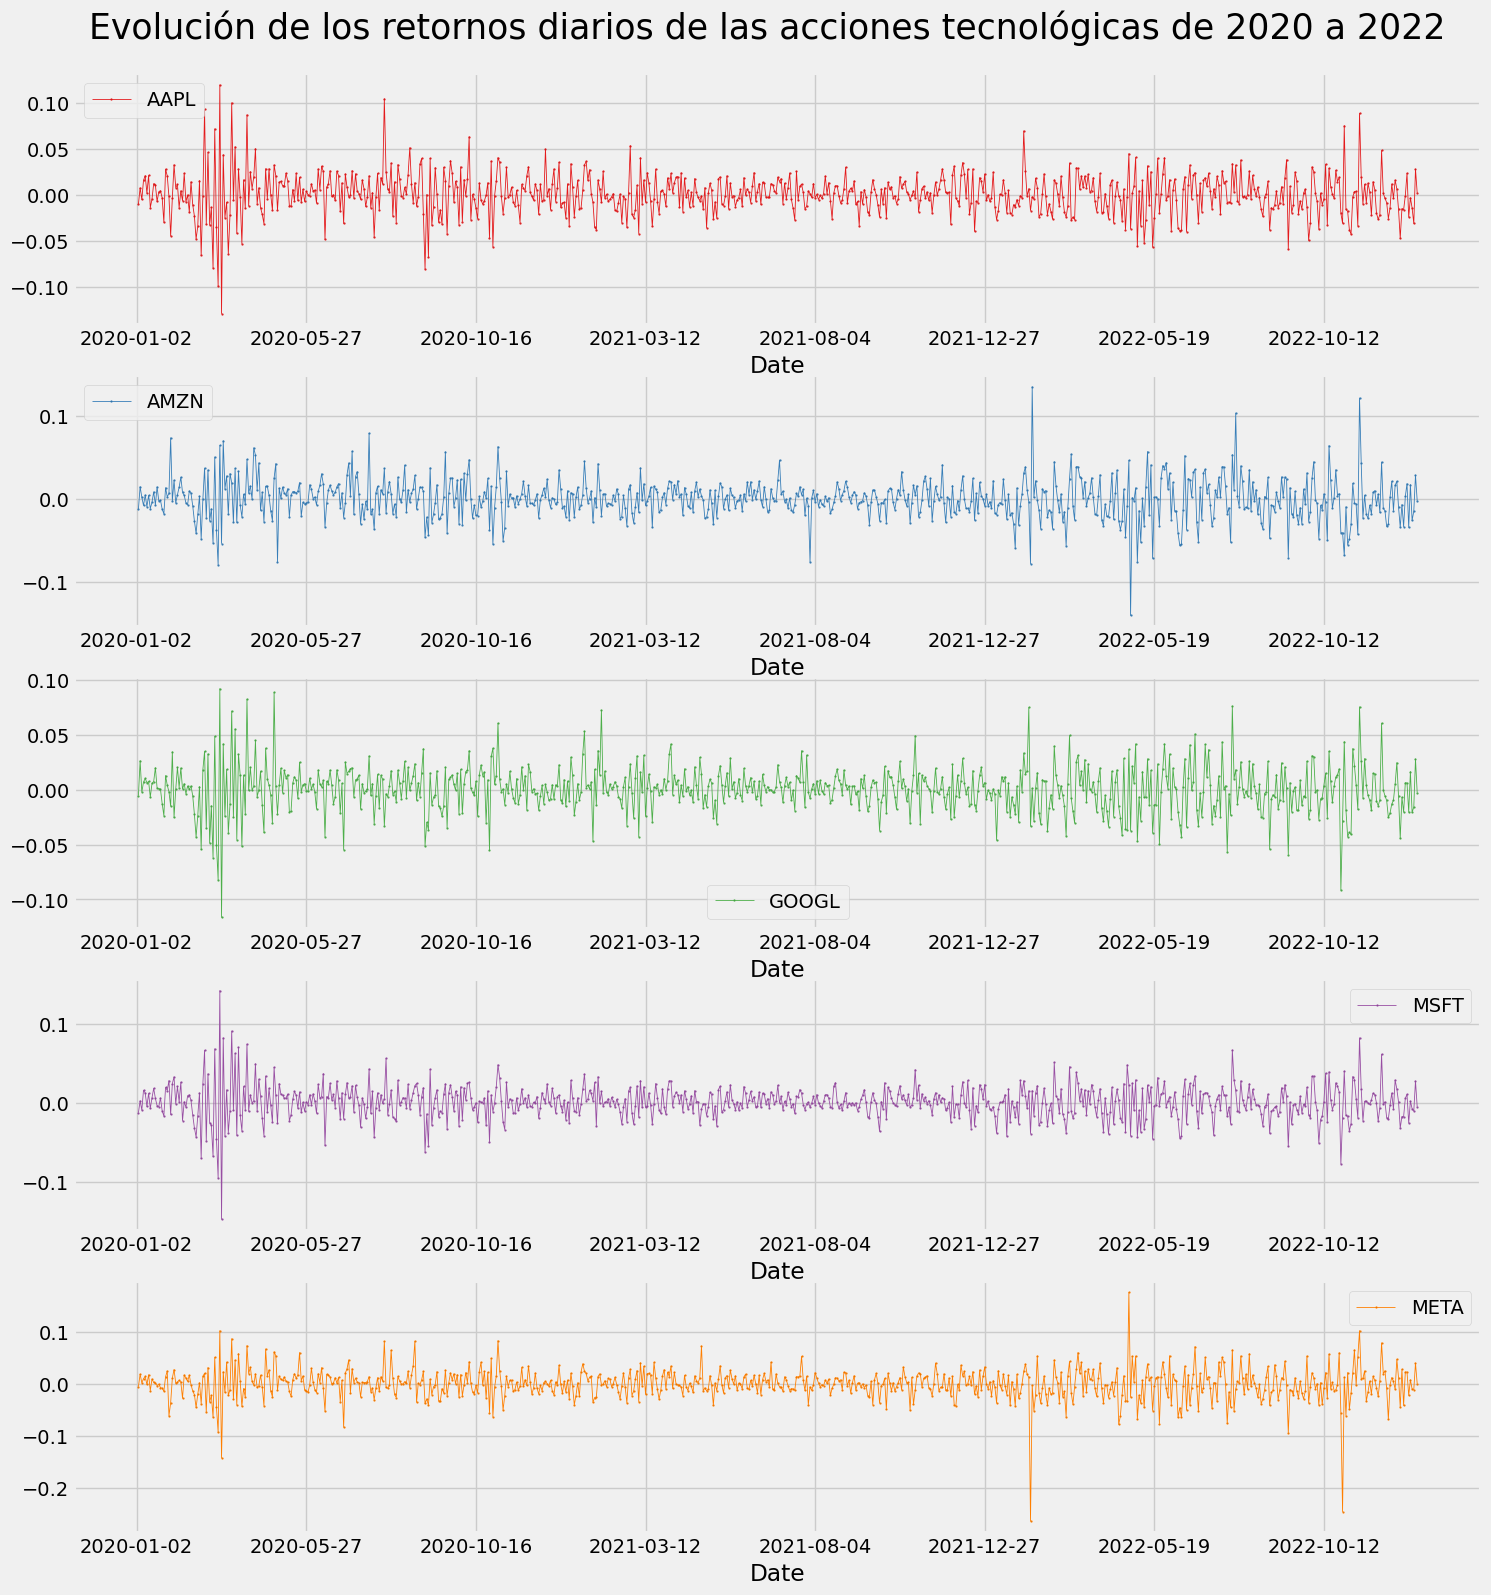

Estadísticas descriptivas breves del retorno diario de las acciones: 

             AAPL        AMZN       GOOGL        MSFT        META
count  755.000000  755.000000  755.000000  755.000000  755.000000
mean     0.001024    0.000141    0.000573    0.000808   -0.000248
std      0.023266    0.024621    0.021748    0.021895    0.030692
min     -0.128647   -0.140494   -0.116341   -0.147390   -0.263901
25%     -0.011103   -0.012856   -0.009675   -0.009685   -0.013412
50%      0.000613    0.000554    0.001088    0.000699    0.000436
75%      0.014154    0.012240    0.012000    0.012323    0.014893
max      0.119808    0.135359    0.092412    0.142169    0.175936


In [165]:
# Calculando el retorno diario de las acciones
stocks_returns = stocks_data.pct_change()

# Graficamos los retornos diarios
grafRetorno(stocks_returns, "Evolución de los retornos diarios de las acciones tecnológicas de 2020 a 2022")

# Datos estadísticos sumarios del retorno acciones
print(f'Estadísticas descriptivas breves del retorno diario de las acciones: \n\n{stocks_returns.describe()}')

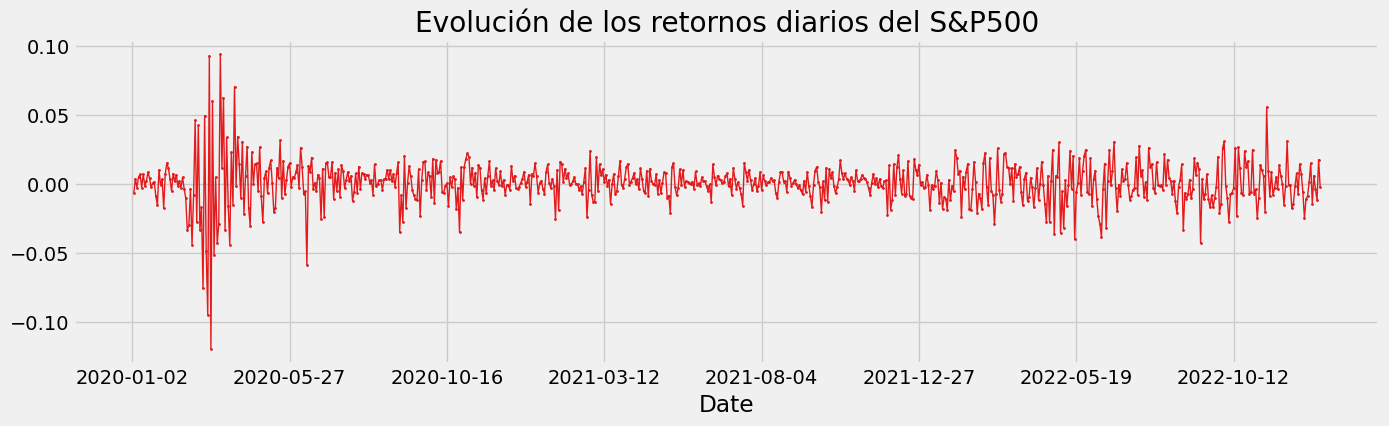

Estadísticas descriptivas breves del retorno de nuestro índice (S&P500): 

 count    755.000000
mean       0.000347
std        0.016041
min       -0.119841
25%       -0.006735
50%        0.000881
75%        0.008207
max        0.093828
Name: Close, dtype: float64


In [166]:
# Calculamos el retorno diario nuestro índice de referencia referencia (S&P 500)
sp_returns = benchmark_data['Close'].pct_change()

# Graficamos el retorno diario
plt.figure(figsize=(15,4))
sp_returns.plot(marker='o',markersize=1,markerfacecolor='k', title='Evolución de los retornos diarios del S&P500', lw=1, color=paleta[0])
plt.show()

# Datos estadísticos sumarios del retorno de S&P 500
print(f'Estadísticas descriptivas breves del retorno de nuestro índice (S&P500): \n\n {sp_returns.describe()}')

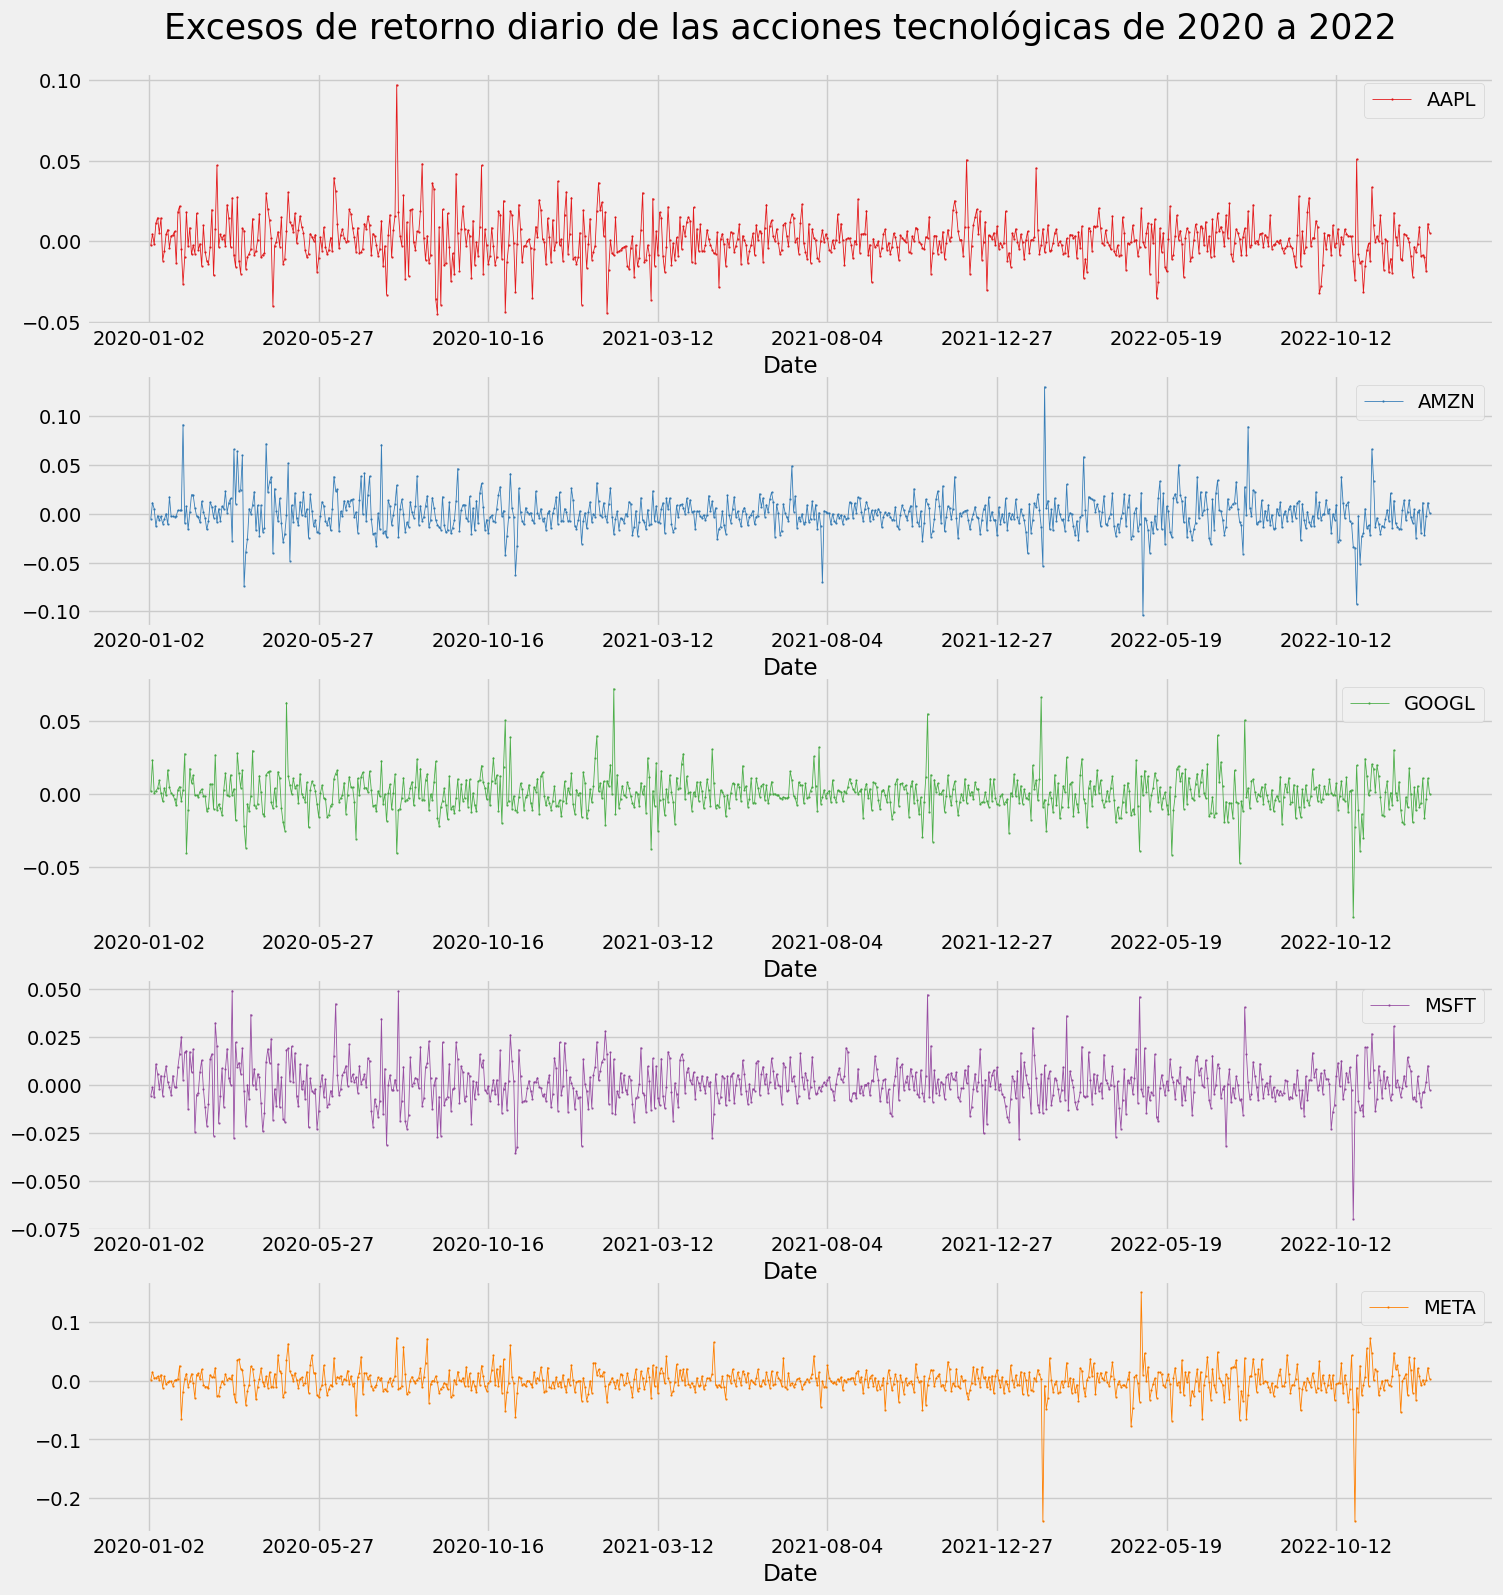

Estadísticas descriptivas breves del exceso de retorno (rendimiento adicional por encima de nuestro benchmark): 

              AAPL        AMZN       GOOGL        MSFT        META
count  755.000000  755.000000  755.000000  755.000000  755.000000
mean     0.000677   -0.000206    0.000226    0.000461   -0.000595
std      0.013527    0.018638    0.012774    0.011539    0.023626
min     -0.044935   -0.104210   -0.084017   -0.069769   -0.239510
25%     -0.007108   -0.009941   -0.006589   -0.006213   -0.009901
50%     -0.000059   -0.001304   -0.000210   -0.000031   -0.000574
75%      0.007488    0.008631    0.006910    0.005963    0.009993
max      0.097018    0.130202    0.071816    0.049298    0.151189


In [167]:
# Calculando la diferencia entre las acciones y S&P500
excess_returns = stocks_returns.sub(sp_returns, axis=0)

# Graficamos las diferencias

grafRetorno(excess_returns, "Excesos de retorno diario de las acciones tecnológicas de 2020 a 2022")

# Datos estadísticos sumarios de la diferencia de retornos
print(f'Estadísticas descriptivas breves del exceso de retorno (rendimiento adicional por encima de nuestro benchmark): \n\n {excess_returns.describe()}')


In [14]:
#Separamos nuestro dataset de excesos de retorno por año

excess_returns_2020 = excess_returns.loc['2020-01-01':'2020-12-31']
excess_returns_2021 = excess_returns.loc['2021-01-01':'2021-12-31']
excess_returns_2022 = excess_returns.loc['2022-01-01':'2022-12-31']

#### Paso 1:
* Se calcula el promedio del exceso de retorno para obtener una aproximación del rendimiento promedio de las acciones por día en comparación con el S&P500.

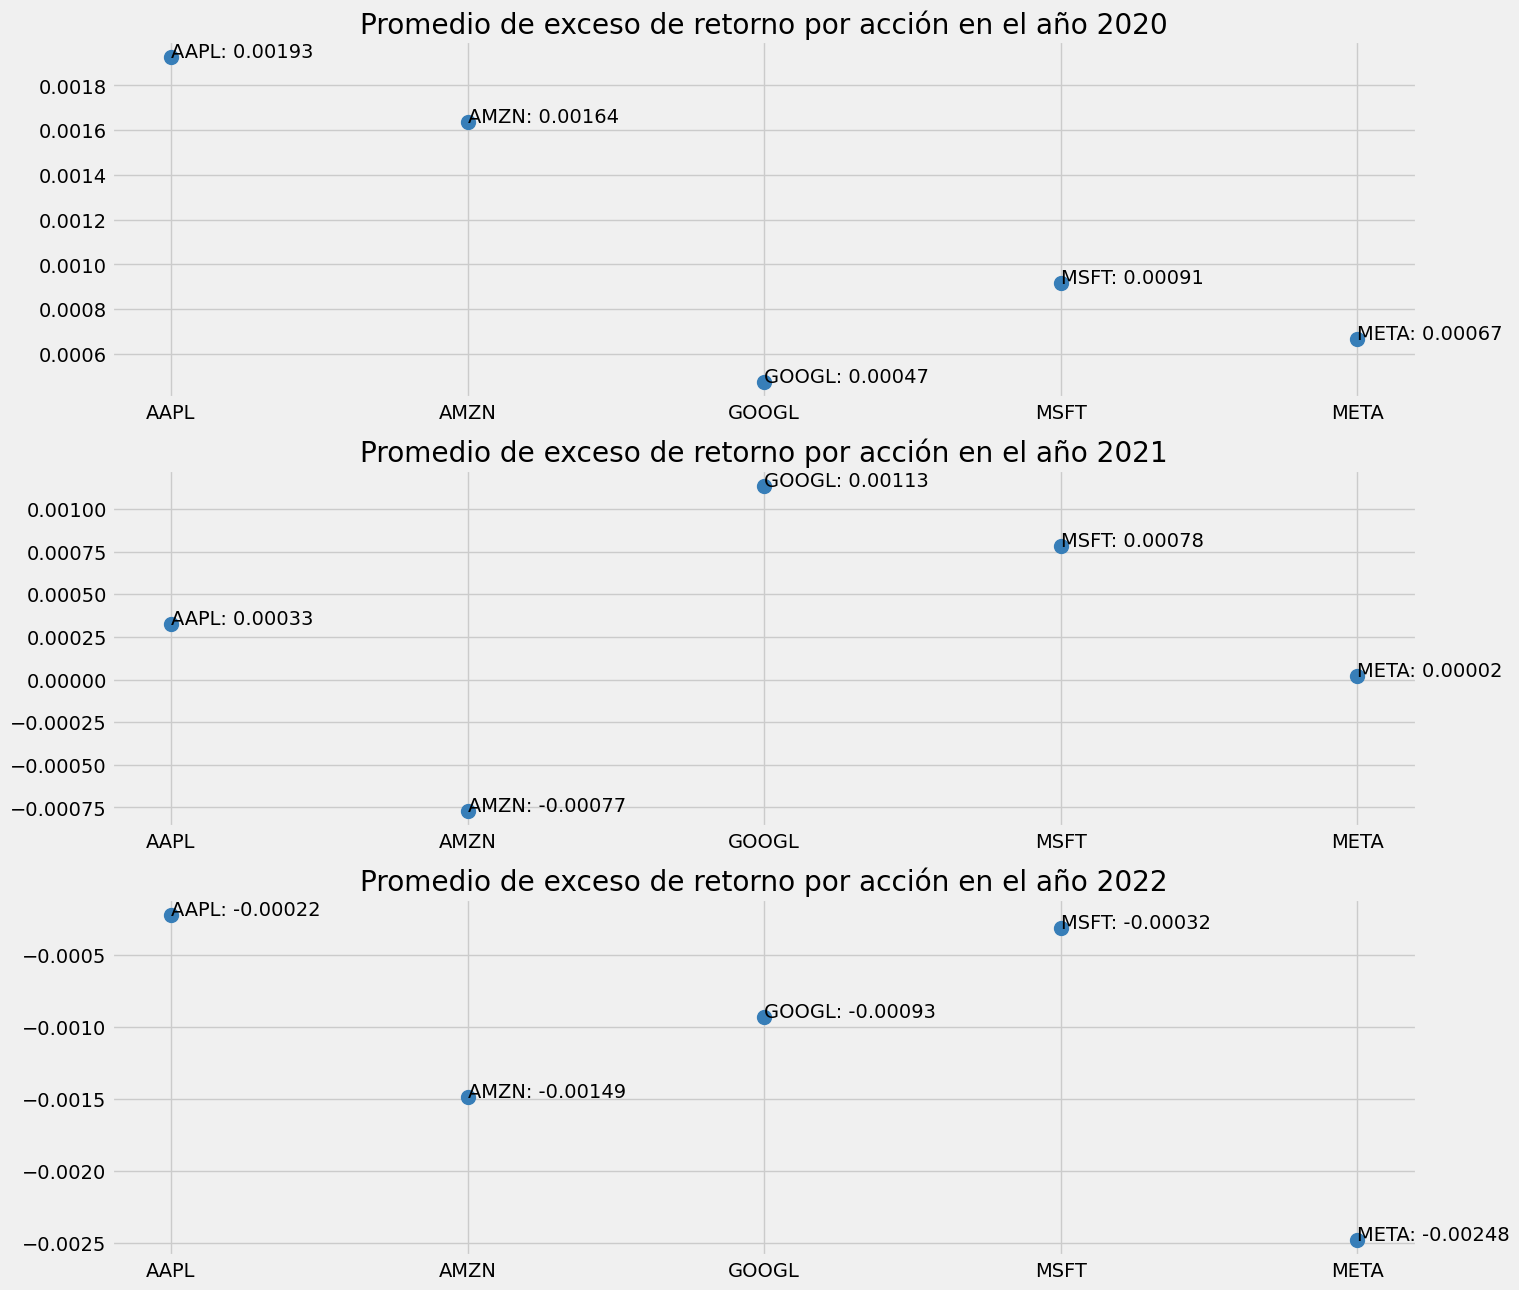

El promedio del exceso de retorno de las acciones en el año 2020 es: 

 AAPL     0.001925
AMZN     0.001635
GOOGL    0.000474
MSFT     0.000915
META     0.000665
dtype: float64

El promedio del exceso de retorno de las acciones en el año 2021 es: 

 AAPL     0.000326
AMZN    -0.000771
GOOGL    0.001133
MSFT     0.000783
META     0.000019
dtype: float64

El promedio del exceso de retorno de las acciones en el año 2022 es: 

 AAPL    -0.000224
AMZN    -0.001486
GOOGL   -0.000933
MSFT    -0.000317
META    -0.002478
dtype: float64



In [175]:
# Calculamos el promedio de la diferencia del retorno.
avg_excess_return_2020 = excess_returns_2020.mean()
avg_excess_return_2021 = excess_returns_2021.mean()
avg_excess_return_2022 = excess_returns_2022.mean()

fig, axs = plt.subplots(3, figsize=(15,15))
grafAvgStd(avg_excess_return_2020,0, 'Promedio de exceso de retorno por acción en el año 2020', paleta[1])
grafAvgStd(avg_excess_return_2021,1, 'Promedio de exceso de retorno por acción en el año 2021', paleta[1])
grafAvgStd(avg_excess_return_2022,2, 'Promedio de exceso de retorno por acción en el año 2022', paleta[1])
plt.show()


print(f'El promedio del exceso de retorno de las acciones en el año 2020 es: \n\n {avg_excess_return_2020}\n')
print(f'El promedio del exceso de retorno de las acciones en el año 2021 es: \n\n {avg_excess_return_2021}\n')
print(f'El promedio del exceso de retorno de las acciones en el año 2022 es: \n\n {avg_excess_return_2022}\n')

#### Paso 2: 
* Se calcula la desviación estándar de las diferencias del retorno. Esto indica la volatilidad o riesgo relativo en relación al S&P 500.

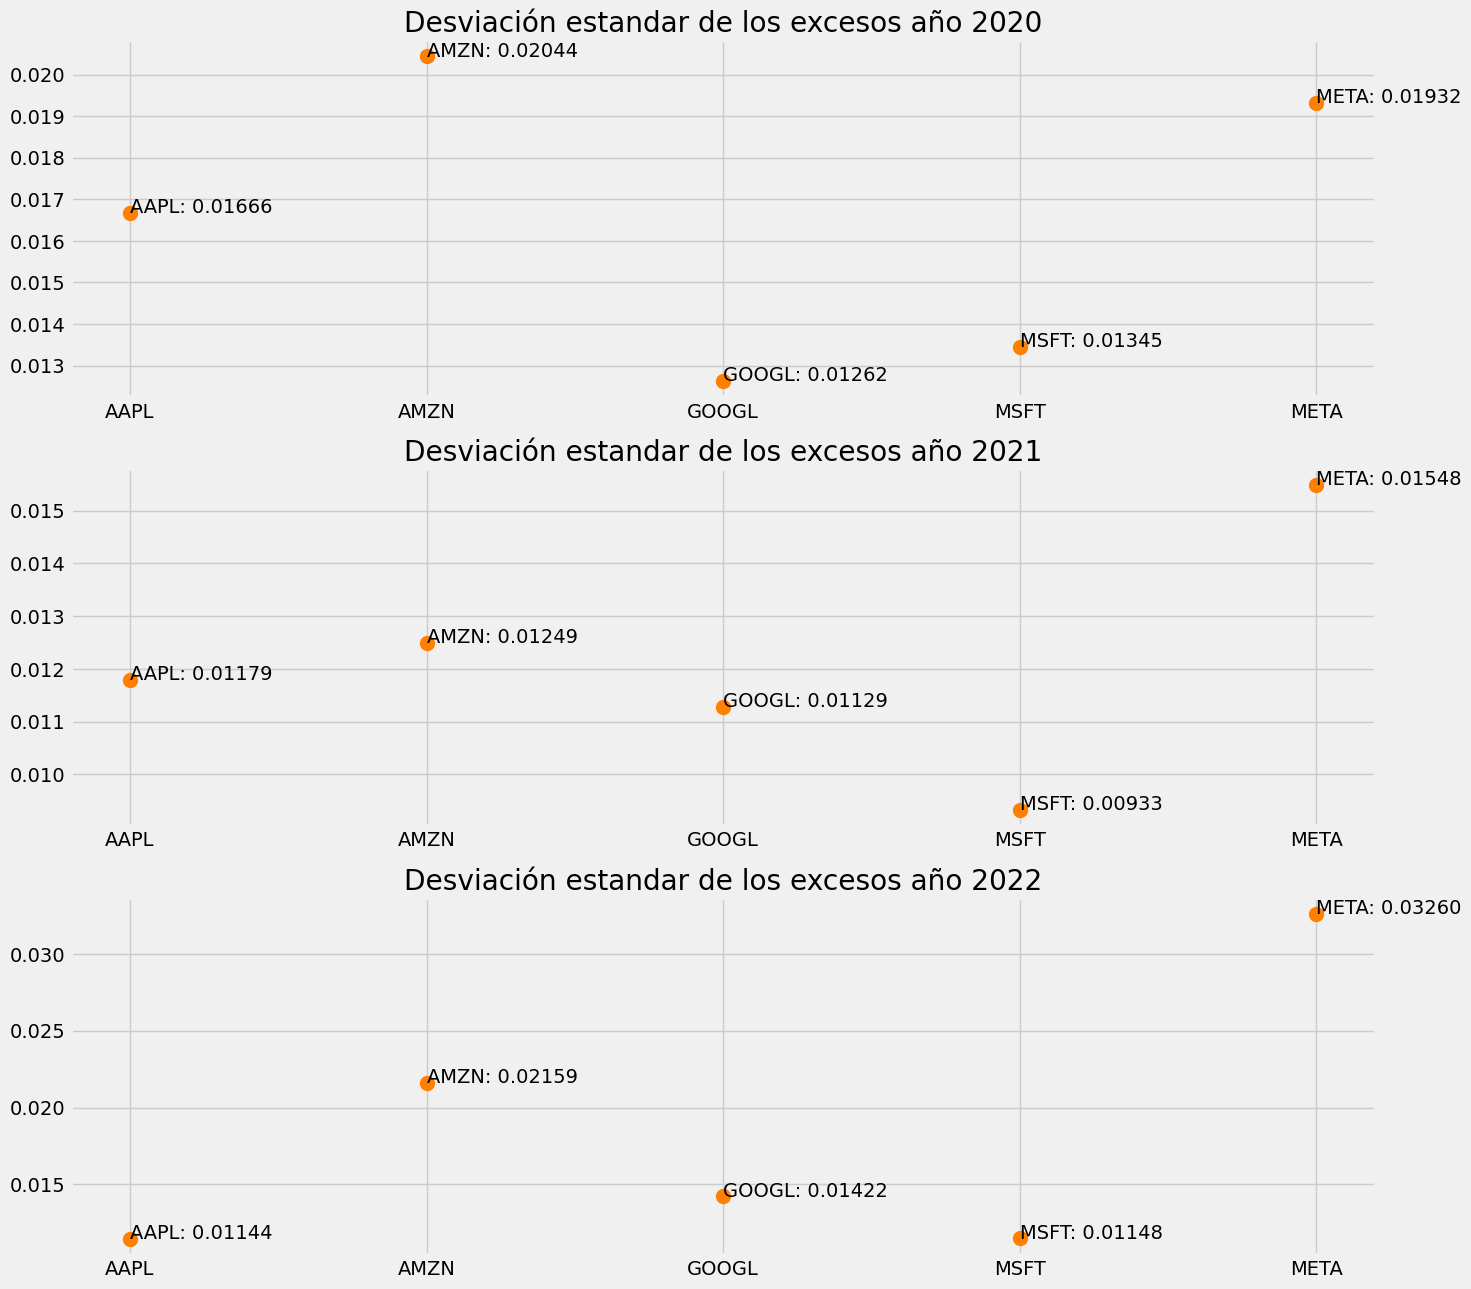

La desviación estandar del retorno diario de las acciones en el año 2020 es: 

 AAPL     0.0167
AMZN     0.0204
GOOGL    0.0126
MSFT     0.0134
META     0.0193
dtype: float64

La desviación estandar del retorno diario de las acciones en el año 2021 es: 

 AAPL     0.0118
AMZN     0.0125
GOOGL    0.0113
MSFT     0.0093
META     0.0155
dtype: float64

La desviación estandar del retorno diario de las acciones en el año 2022 es: 

 AAPL     0.0114
AMZN     0.0216
GOOGL    0.0142
MSFT     0.0115
META     0.0326
dtype: float64



In [170]:
# Calculamos las desviaciones std.
sd_excess_return_2020 = excess_returns_2020.std()
sd_excess_return_2021 = excess_returns_2021.std()
sd_excess_return_2022 = excess_returns_2022.std()

# Graficamos

fig, axs = plt.subplots(3, figsize=(15,15))
grafAvgStd(sd_excess_return_2020,0, 'Desviación estandar de los excesos año 2020', paleta[4])
grafAvgStd(sd_excess_return_2021,1, 'Desviación estandar de los excesos año 2021', paleta[4])
grafAvgStd(sd_excess_return_2022,2, 'Desviación estandar de los excesos año 2022', paleta[4])
plt.show()


print(f'La desviación estandar del retorno diario de las acciones en el año 2020 es: \n\n {np.round(sd_excess_return_2020,4)}\n')
print(f'La desviación estandar del retorno diario de las acciones en el año 2021 es: \n\n {np.round(sd_excess_return_2021,4)}\n')
print(f'La desviación estandar del retorno diario de las acciones en el año 2022 es: \n\n {np.round(sd_excess_return_2022,4)}\n')

#### Calculando el Sharpe Ratio

* Primero se divide el promedio de las diferencias de retorno (calculado en el paso 1) por la desviación estándar de las diferencias de retorno (calculado en el paso 2).
* El resultado es el Ratio de Sharpe, que indica cuánto más o menos retorno tiene la oportunidad de inversión considerada por unidad de riesgo.
* Luego el Ratio de Sharpe se anualiza multiplicándolo por la raíz cuadrada del número de períodos (en este caso, días de negociación) en un año. Esto hace que sea más fácil comparar el Ratio de Sharpe entre diferentes inversiones y en diferentes períodos de tiempo.

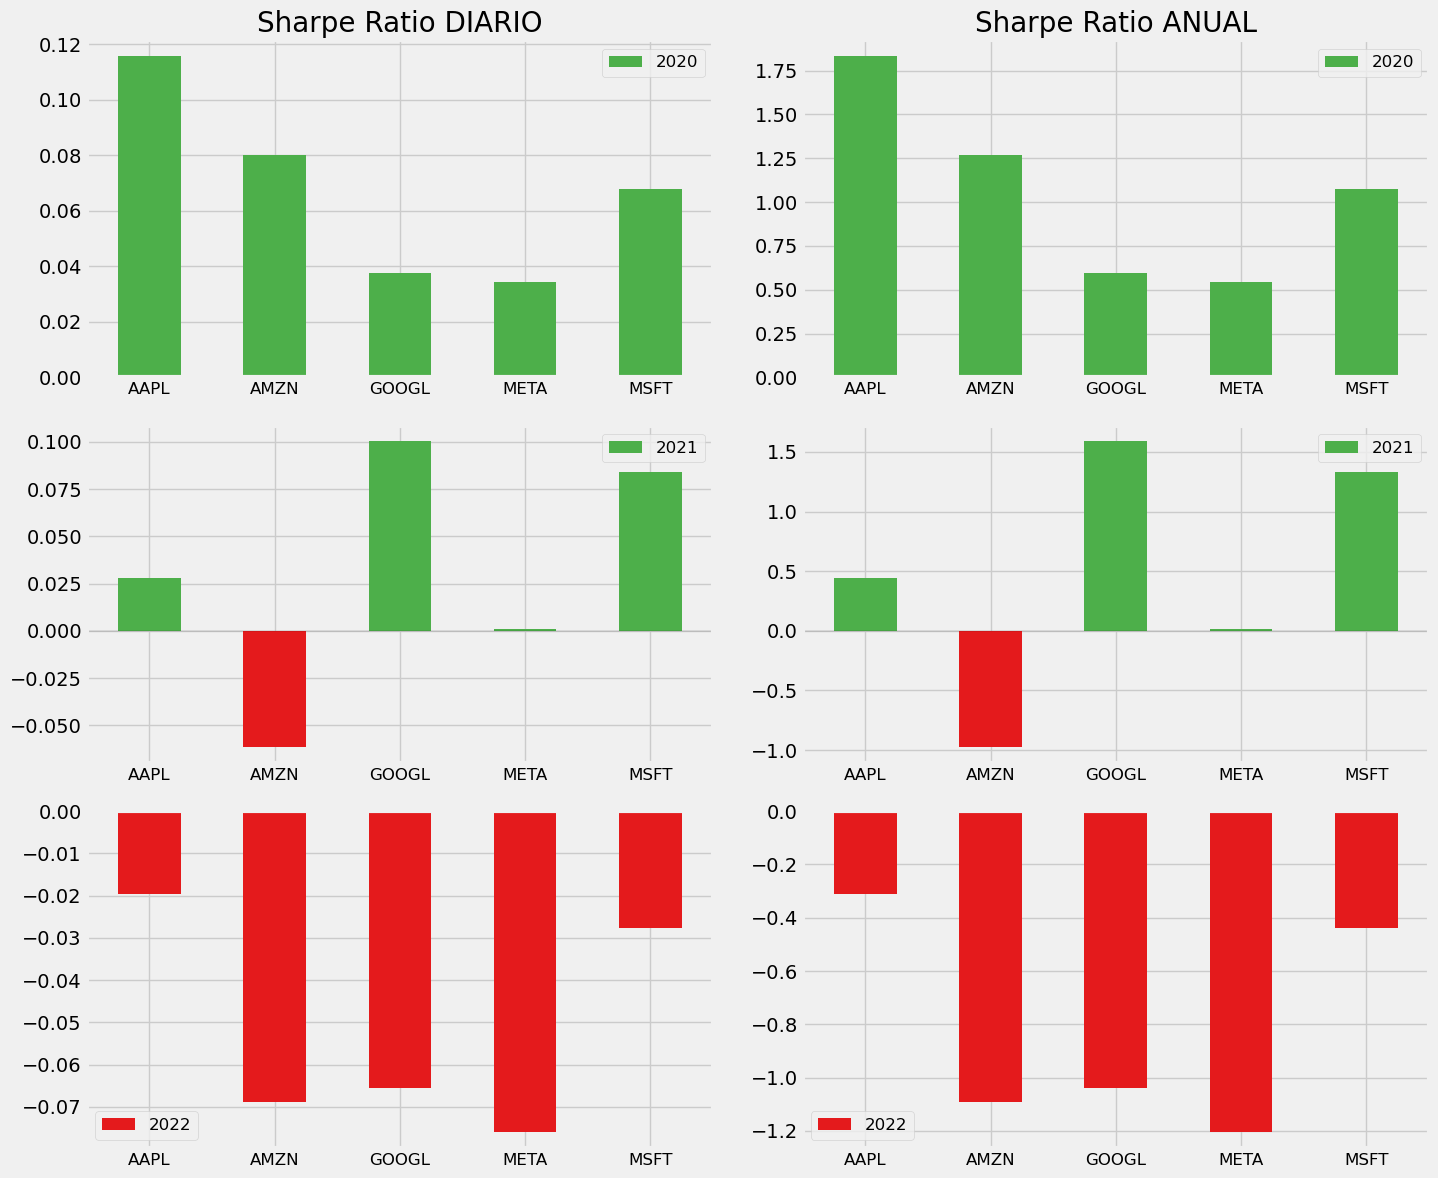

Sharpe Ratio DIARIO en el año 2020 es de: 
AAPL     0.1156
AMZN     0.0800
GOOGL    0.0375
META     0.0344
MSFT     0.0680
dtype: float64

Sharpe Ratio ANUALIZADO en el año 2020: 
AAPL     1.8314
AMZN     1.2674
GOOGL    0.5941
META     0.5450
MSFT     1.0773
dtype: float64

####################################################################################################

Sharpe Ratio DIARIO en el año 2021 es de: 
AAPL     0.0277
AMZN    -0.0617
GOOGL    0.1004
META     0.0012
MSFT     0.0840
dtype: float64

Sharpe Ratio ANUALIZADO en el año 2021: 
AAPL     0.4389
AMZN    -0.9775
GOOGL    1.5906
META     0.0190
MSFT     1.3308
dtype: float64

####################################################################################################

Sharpe Ratio DIARIO en el año 2022 es de: 
AAPL    -0.0196
AMZN    -0.0688
GOOGL   -0.0656
META    -0.0760
MSFT    -0.0277
dtype: float64

Sharpe Ratio ANUALIZADO en el año 2022: 
AAPL    -0.3105
AMZN    -1.0900
GOOGL   -1.0393
META    -1.2041


In [176]:
# Calculamos el Sharpe Ratio diario para cada año
daily_sharpe_ratio_2020 = np.round(avg_excess_return_2020.div(sd_excess_return_2020),4).sort_index()
daily_sharpe_ratio_2021 = np.round(avg_excess_return_2021.div(sd_excess_return_2021),4).sort_index()
daily_sharpe_ratio_2022 = np.round(avg_excess_return_2022.div(sd_excess_return_2022),4).sort_index()


# Anualizamos
annual_factor = np.sqrt(251)
annual_sharpe_ratio_2020 = np.round(daily_sharpe_ratio_2020.mul(annual_factor),4).sort_index()
annual_sharpe_ratio_2021 = np.round(daily_sharpe_ratio_2021.mul(annual_factor),4).sort_index()
annual_sharpe_ratio_2022 = np.round(daily_sharpe_ratio_2022.mul(annual_factor),4).sort_index()

    
#Graficamos

fig, axs = plt.subplots(3,2, figsize=(15, 12))
plt.subplots_adjust(wspace=20, hspace=20)

#Sharpe ratio diario

daily_sharpe_ratio_2020.plot(kind='bar', ax=axs[0,0], label='2020' , color=[get_color(val) for val in daily_sharpe_ratio_2020])
daily_sharpe_ratio_2021.plot(kind='bar', ax=axs[1,0], label='2021', color=[get_color(val) for val in daily_sharpe_ratio_2021])
daily_sharpe_ratio_2022.plot(kind='bar', ax=axs[2,0], label='2022', color=[get_color(val) for val in daily_sharpe_ratio_2022])

axs[0,0].set_title('Sharpe Ratio DIARIO', fontsize=20)

axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(), rotation=0, fontsize=12)
axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(), rotation=0, fontsize=12)
axs[2,0].set_xticklabels(axs[2,0].get_xticklabels(), rotation=0, fontsize=12)

axs[0,0].legend(fontsize=12)
axs[1,0].legend(fontsize=12)
axs[2,0].legend(fontsize=12)

#Sharpe ratio anual

annual_sharpe_ratio_2020.plot(kind='bar', ax=axs[0,1], label='2020',color=[get_color(val) for val in annual_sharpe_ratio_2020])
annual_sharpe_ratio_2021.plot(kind='bar', ax=axs[1,1], label='2021',color=[get_color(val) for val in annual_sharpe_ratio_2021])
annual_sharpe_ratio_2022.plot(kind='bar', ax=axs[2,1], label='2022',color=[get_color(val) for val in annual_sharpe_ratio_2022])

axs[0,1].set_title('Sharpe Ratio ANUAL', fontsize=20)

axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(), rotation=0, fontsize=12)
axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(), rotation=0, fontsize=12)
axs[2,1].set_xticklabels(axs[2,1].get_xticklabels(), rotation=0, fontsize=12)

axs[0,1].legend(fontsize=12)
axs[1,1].legend(fontsize=12)
axs[2,1].legend(fontsize=12)

#Linea 0

axs[1,0].axhline(y=0, color='black', linestyle='-', linewidth=0.1)
axs[1,1].axhline(y=0, color='black', linestyle='-', linewidth=0.1)


#Despliegue

plt.tight_layout()
plt.show()


sharpe_ratios = [
    (daily_sharpe_ratio_2020, annual_sharpe_ratio_2020, 2020),
    (daily_sharpe_ratio_2021, annual_sharpe_ratio_2021, 2021),
    (daily_sharpe_ratio_2022, annual_sharpe_ratio_2022, 2022)
]

#Imprimimos los resultados en pantalla

for daily_ratio, annual_ratio, year in sharpe_ratios:
    print(f'Sharpe Ratio DIARIO en el año {year} es de: \n{daily_ratio}\n')
    print(f'Sharpe Ratio ANUALIZADO en el año {year}: \n{annual_ratio}\n\n{"#"*100}\n')